# Modeling: Initial
Herein is my first attempt at creating a multi-ouput regression neural network.
I have learned much from [this article by Jason Brownlee on the subject](https://machinelearningmastery.com/deep-learning-models-for-multi-output-regression/), which was linked to me by my DSI-830 instructor Patrick Waled-Dinian

Plan:
* Import numpy arrays X and y 
* Create train-test split
* Assemble a Convolutional Neural Network
* Fit and assess CNN

In [5]:
## Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split

from os.path import exists
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.metrics import MAE

In [10]:
## Constants
working_date = '11_06_2021'
working_time = '16_31_26'

model_history_file = '../models/model_history.csv'

In [11]:
## Directories
data_directory = f'../data/{working_date}/{working_time}'
model_directory = f'../models/{working_date}/{working_time}'

## File paths
input_dataset_file = f'{data_directory}/X.npy'
target_dataset_file = f'{data_directory}/y.npy'

In [55]:
## Make sure model history exists
if not exists(model_history_file):
    model_history = pd.DataFrame(columns=['model', 'history'])
else:
    model_history = pd.read_csv(model_history_file, index_col=0)

## Data

### Load Datasets

In [13]:
## Load the datasets
X = np.load(input_dataset_file)
y = np.load(target_dataset_file)

### Create Train/Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Model

### Create Framework

In [15]:
## Lesson 8.03
model = Sequential()
model.add(Flatten(input_shape=(32,32,1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='linear'))

### Compile

In [16]:
model.compile(loss='mse', optimizer='adam', metrics=[MAE])

### Fit

In [17]:
X_train[0].shape

(32, 32, 1)

In [18]:
results = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

In [19]:
results.history['loss'][-1]

0.007864867337048054

In [20]:
results.history['mean_absolute_error'][-1]

0.05443267151713371

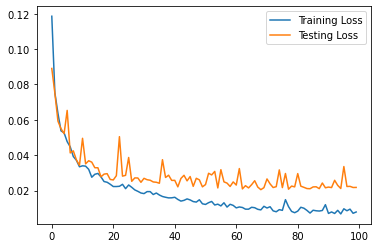

In [21]:
plt.plot(results.history['loss'], label = 'Training Loss')
plt.plot(results.history['val_loss'], label = 'Testing Loss')
plt.legend();

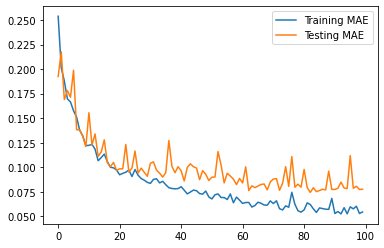

In [22]:
plt.plot(results.history['mean_absolute_error'], label = 'Training MAE')
plt.plot(results.history['val_mean_absolute_error'], label = 'Testing MAE')
plt.legend();

In [23]:
preds = model.predict(X_test)

In [24]:
preds

array([[0.02152353, 1.0291115 ],
       [0.58715653, 0.29073834],
       [0.44118237, 0.9705342 ],
       ...,
       [0.07193129, 0.03642164],
       [0.01563924, 0.9710234 ],
       [0.4305348 , 0.97882867]], dtype=float32)

## Save model

In [52]:
model_index = max(0, model_history.index.max() + 1)
model_path = f'{model_directory}/model_{model_index}.h5'

history_dictionary = {
    'model': model_path,
    'history': results.history
}

model_history = model_history.append(history_dictionary, ignore_index=True)
model_history.tail(1)

,model,history
0,../models/11_06_2021/16_31_26/model_0.h5,"{'loss': [0.11859388649463654, 0.0753109157085..."


In [54]:
## Saving as h5 for backwards compatibility
model.save(model_path, save_format='h5')
model_history.to_csv(model_history_file)